# **Assignment 3 - Time Series Analysis using Convolutional Neural Networks**

## Group 4

*  Jimuel A. Cacayan
*  Paul Miguel C. Reonal
*  Von Carlo R. Ojastro
*  Jethro John M. Padilla



## 1. Install **keras_sequential_ascii** package for model presentation

In [18]:
!pip install keras_sequential_ascii

  Preparing metadata (setup.py) ... done
  Created wheel for keras_sequential_ascii: filename=keras_sequential_ascii-0.1.1-py3-none-any.whl size=3042 sha256=4767d573ead70452b8041b4a161e3ed6d1c889744f3b6580f715bb4fc36ab267
  Stored in directory: /root/.cache/pip/wheels/50/10/f3/5eeae758ef81ee4e16d618471561509355b0f2e5f38bf41185
Successfully built keras_sequential_ascii


## 2. Import necessary libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from keras_sequential_ascii import keras2ascii

## 3. Fetch data set from source

In [2]:
# Data source, matrix Pivot format
# https://openstat.psa.gov.ph/PXWeb/pxweb/en/DB/DB__2E__CS/0032E4ECNV0.px/?rxid=bdf9d8da-96f1-4100-ae09-18cb3eaeb313

# Transformed data set, raw tabular format
ds_url = ('https://raw.githubusercontent.com/hantak123/CSS262_RawData/main/RiceConvertedData3.csv')
df = pd.read_csv(ds_url)
print(df.head(5))

          Classifier  Month  Year  DATE_YEAR  DATE_ID   STOCK
0  Rice: Total Stock      1  2000     200001        1  2364.5
1  Rice: Total Stock      2  2000     200002        2  2042.3
2  Rice: Total Stock      3  2000     200003        3  1765.7
3  Rice: Total Stock      4  2000     200004        4  1874.9
4  Rice: Total Stock      5  2000     200005        5  2067.0


## 4. Create Sequence Function
##### Sequence is a subset of the target data set that is needed by the conv1D as input. The number of data in a sequence will be determined by the sequence length.
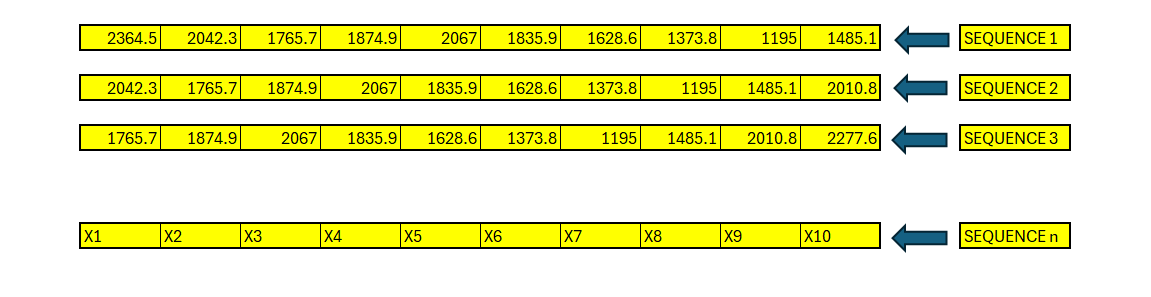

In [3]:
# Define a function to create sequences for training
def create_sequences(data, seq_length):
    sequences = []
    target = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        target.append(data[i+seq_length])
    return np.array(sequences), np.array(target)

## 5. Get training data from data set, in this case we will get the data from the STOCK column

In [4]:
df = df.drop(df.columns[[0,1,2,3]], axis=1)

X = df.iloc[:, 1]

## 6. Create a sequence of values from the STOCK data set and get the training data and testing data

In [5]:
seq_length = 10
X_train, y_train = create_sequences(X, seq_length)
X_test, y_test = create_sequences(X, seq_length)

## 7. Reshape the training ad testing data set

In [6]:

# Reshape the input data for the CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


## 8. Create a 1-Dimension convolutional model

In [7]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
input_shape=(seq_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))  # Output layer for regression


## 9. Compile the Model

In [8]:
# Compile the model
# Mean Squared Error for regression
model.compile(optimizer='adam', loss='mse')


#### The 1-Dimensional CNN Sequential Model has the following layers:

*   10x1 input layer
*   Convolutional Layer of 64 Filters with a kernel size of 3
*   Max pooling with a dimension of 54 and has pool size of 2
*   Flatten layer 256 Neurons
*   A Dense layer with 50 Neurons with a ReLU activation function
*   Dense layer as Output layer with 1 Neuron


In [20]:
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     10    1
              Conv1D    \|/  -------------------       256     1.9%
                relu   #####      8   64
        MaxPooling1D   Y max -------------------         0     0.0%
                       #####      4   64
             Flatten   ||||| -------------------         0     0.0%
                       #####         256
               Dense   XXXXX -------------------     12850    97.7%
                relu   #####          50
               Dense   XXXXX -------------------        51     0.4%
                       #####           1


## 10. Train the model using the training data set and create predictions

In [13]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test,y_test), verbose=2)
y_pred = model.predict(X_test)
print(history.history.keys())

Epoch 1/50
18/18 - 1s - loss: 72500.6797 - val_loss: 69620.5547 - 581ms/epoch - 32ms/step
Epoch 2/50
18/18 - 0s - loss: 72949.7578 - val_loss: 71753.6250 - 175ms/epoch - 10ms/step
Epoch 3/50
18/18 - 0s - loss: 71586.1953 - val_loss: 69550.4766 - 277ms/epoch - 15ms/step
Epoch 4/50
18/18 - 0s - loss: 72109.0156 - val_loss: 70113.4453 - 320ms/epoch - 18ms/step
Epoch 5/50
18/18 - 0s - loss: 69507.3750 - val_loss: 89029.8750 - 374ms/epoch - 21ms/step
Epoch 6/50
18/18 - 0s - loss: 74649.4609 - val_loss: 75475.8828 - 279ms/epoch - 16ms/step
Epoch 7/50
18/18 - 0s - loss: 72670.2812 - val_loss: 75401.7188 - 278ms/epoch - 15ms/step
Epoch 8/50
18/18 - 0s - loss: 73119.7891 - val_loss: 72413.2422 - 283ms/epoch - 16ms/step
Epoch 9/50
18/18 - 0s - loss: 69054.5234 - val_loss: 73002.1094 - 147ms/epoch - 8ms/step
Epoch 10/50
18/18 - 0s - loss: 72373.0234 - val_loss: 67421.0938 - 132ms/epoch - 7ms/step
Epoch 11/50
18/18 - 0s - loss: 71104.2578 - val_loss: 71127.5391 - 122ms/epoch - 7ms/step
Epoch 12/50

# 11. Model Summary

#### CNN Model Loss over number of Epochs

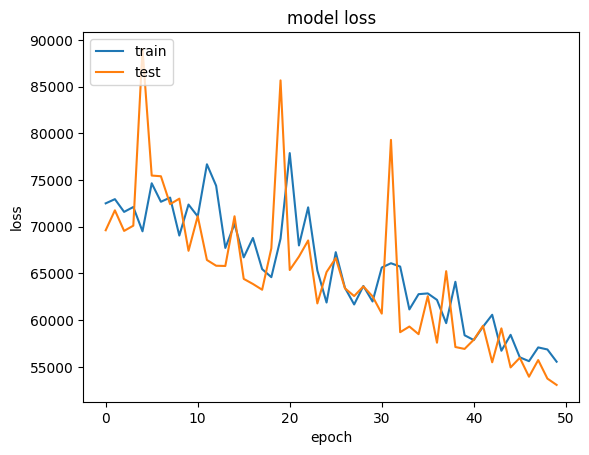

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Graph for comparing the Actual data set V.S. the Predicted Data

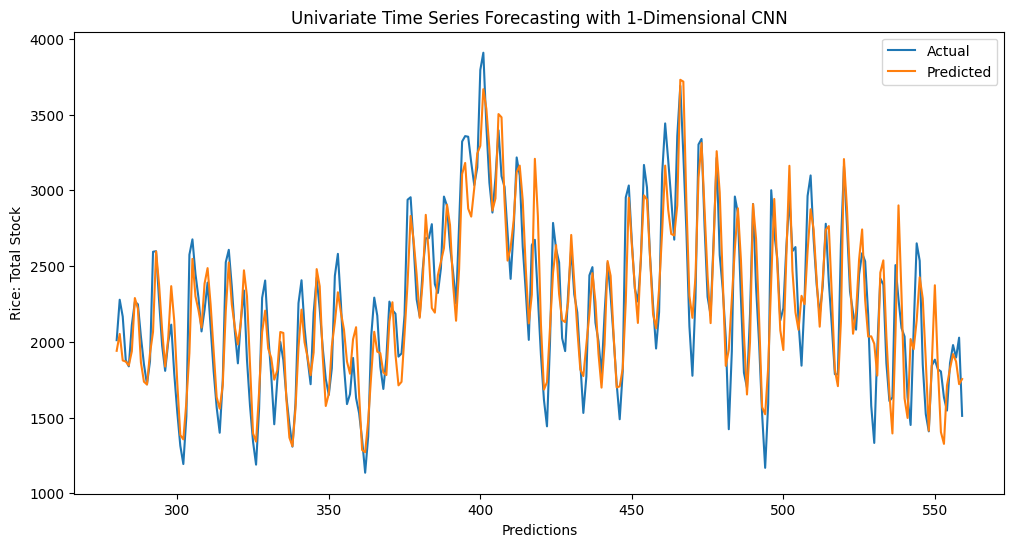

In [15]:
# Plot the original and predicted time series
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, label='Predicted')
plt.legend()
plt.xlabel('Predictions')
plt.ylabel('Rice: Total Stock')
plt.title('Univariate Time Series Forecasting with 1-Dimensional CNN')
plt.show()

## Plotting a line graph for the time series of the actual Stock data set (from Month 1 to Month 290) with the predicted data set (from Month 291 to Month 580)

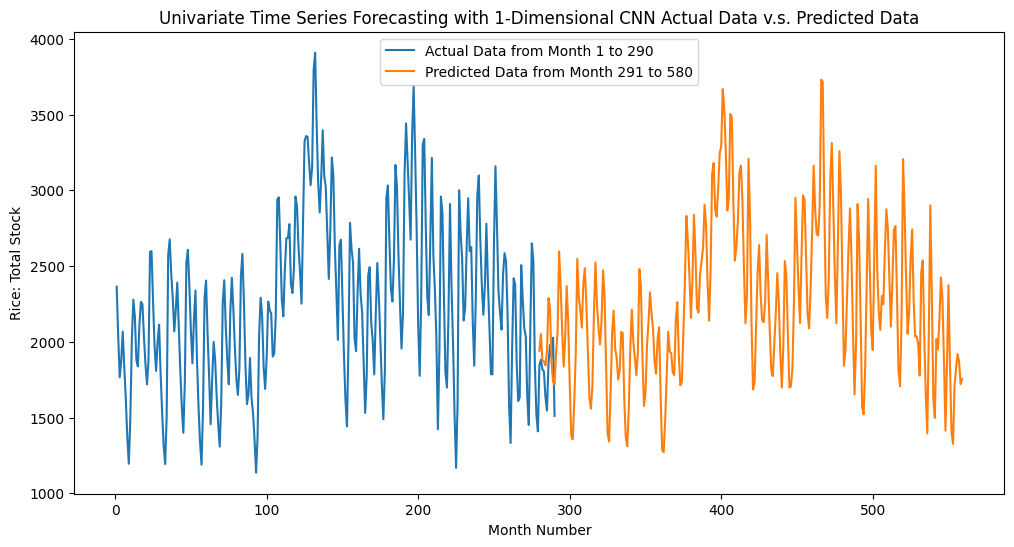

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['DATE_ID'],df['STOCK'], label ='Actual Data from Month 1 to 290')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, label = 'Predicted Data from Month 291 to 580')
plt.legend()
plt.xlabel('Month Number')
plt.ylabel('Rice: Total Stock')
plt.title('Univariate Time Series Forecasting with 1-Dimensional CNN Actual Data v.s. Predicted Data')
plt.show()

## References



1.   https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/
2.   https://medium.com/@findsoulyourself/secrets-behind-the-convolutional-neural-networks-and-lstm-8ad338eaacfe
3.   https://thejaskiran99.medium.com/unlocking-the-potential-of-convolutional-neural-networks-cnns-in-time-series-forecasting-b2fac329e184
4.   https://www.educative.io/answers/what-is-a-max-pooling-layer-in-cnn
5.   https://www.youtube.com/watch?v=yd_j_zdLDWs&t=169s&pp=ygURMSBkaW1lbnNpb25hbCBDTk4%3D
6.   https://www.youtube.com/watch?v=KuXjwB4LzSA&pp=ygURMSBkaW1lbnNpb25hbCBDTk4%3D
7.   https://www.youtube.com/watch?v=kGdbPnMCdOg&t=377s&pp=ygURMSBkaW1lbnNpb25hbCBDTk4%3D

